## Mining exonic embedded microRNAs across different species 

### This script is written by ***Tyron Chang*** , the programming languages and tools used for this study are are shown below:

##### 1. Python (data cleaning and processing)

##### 2. BEDTools (overlapping the exonic microRNAs)

##### 3. Shell (use awk and basic command lines to convert tsv files into bed file)




The general method for this python script is shown below:

* #### Load dataset

* #### Data frame reprocessing ===> Creates two dataframes and concatenate them together

* #### Using Pandas to split and explode the dataframe.

* #### Remove all microRNAs in the finalized dataframe. To separate miRNAs genes from the dataset, you will need to use regular expression.

* #### To figure out which bash scripts to run together with this python script please follow the steps from this document.

* #### The order for running the bash script goes like this:
  1) bedtools_species_exonic_miR.sh
  2) bedtools_species_nonexonic_miR.sh
  3) bedtools_species_intronic_miR.sh 
 

### Data Scraping

#### Instruction

The Data can be obtained from [this link ](https://genome.ucsc.edu/cgi-bin/hgTables), which will take you to UCSC table genome browser. 
This csv file will give you all genes and their associated cooridnates.

You will see:

![Home Page](./homepage.png)


To find the microRNA genes and their corresponding coordinates, please go to miRBase. Here is [this link ](https://www.mirbase.org/download/)

*hsa.gff3 is for human*

![miRBase Page](./miRbase_data.png)


### Now once you have downloaded the data, please import necessary libraries

In [1]:
import pandas as pd

In [2]:
import re ### for data filtering using regex

In [3]:
import matplotlib.pyplot as plt

In [4]:
import os

### Using OOP to refactor code for miR analysis.

In [5]:
#The data (csv file) is obtained from UCSC table genome browser:
#Go to table browser in UCSC genome website.
#The website is https://genome.ucsc.edu/cgi-bin/hgTables----> this is human one. You can also choose different species.


In [6]:
current_dir=os.getcwd() # import current directory

### 1. Human data ( 1st step of data cleaning: reshape column)

In [7]:
import import_ipynb
from utils.Data import HUMAN

importing Jupyter notebook from /Users/tyronchang/Desktop/exonic-microrna-analysis/github3/Human/utils/Data.ipynb


In [8]:
human=HUMAN(f'{current_dir}/UCSC_data_Human/human_genes_010324_NCBI.csv')#human gene coordinates tables

In [9]:
"""This function reorganize and clean the columns by doing the following:"""
human.col_preprocess()
# human.df.columns=gene.df.columns.str.replace("#","") 
### Get rid of "#" symbols in the column names.
# gene.df.columns=gene.df.columns.str.replace('"',"")
### Remove '' in the column names.

In [10]:
human.drop()### drop 'bin' column

In [11]:
human.df.rename(columns={'name2':'gene_name'},inplace=True)
### Replace the column name

In [12]:
# Function to calculate mature mRNA length
def calculate_mrna_length(row):
    """This function will give you mature mRNA length"""
    """
    1. split starts and ends site based on ",".
    2. calculate the length of each exons.
    3. sum them up
    """
    starts = list(map(int, row['exonStarts'].split(',')[:-1]))# exclude the last "," and make a list of starts site and change them to integar
    ends = list(map(int, row['exonEnds'].split(',')[:-1]))# exclude the last "," and make a list of ends site and change them to integar
    lengths = [end - start for start, end in zip(starts, ends)]# use list comprehension. First pair them up use zip function, and then calculate the length of each exon
    return sum(lengths)

# Apply the function to each row and create a new column for mRNA length
human.df['mature_mRNA_Length'] = human.df.apply(calculate_mrna_length, axis=1)


In [13]:
human_gene_df=human.select(['chrom','exonStarts','exonCount',
                        'gene_name','name'])
### Create a new data frame by selecting certain columns from the original dataframe.

In [14]:
human_gene_df['exonStarts']=human_gene_df['exonStarts'].str.replace(r',\Z','',regex=True)
### remove the comma by the end of the column prior to splitting the data. \Z means the end of the line.

In [15]:
human_gene_df['exonStarts']=human_gene_df['exonStarts'].str.split(",")

In [16]:
human_gene_df=human_gene_df.explode('exonStarts')

In [17]:
human_gene_df=human_gene_df.reset_index(drop=True)

In [18]:
human.df

,name,chrom,strand,txStart,txEnd,cdsStart,cdsEnd,exonCount,exonStarts,exonEnds,score,gene_name,cdsStartStat,cdsEndStat,exonFrames,mature_mRNA_Length
0,XM_011541469.2,chr1,-,67092164,67109072,67093004,67103382,5,"67092164,67095234,67096251,67103237,67109028,","67093604,67095421,67096321,67103382,67109072,",0,C1orf141,cmpl,cmpl,"0,2,1,0,-1,",1886
1,XM_017001276.2,chr1,-,67092164,67131227,67093004,67127240,9,"67092164,67095234,67096251,67103237,67111576,6...","67093604,67095421,67096321,67103382,67111644,6...",0,C1orf141,cmpl,cmpl,"0,2,1,0,1,2,0,0,-1,",2359
2,XM_011541467.2,chr1,-,67092164,67131227,67093004,67127240,9,"67092164,67095234,67096251,67103237,67111576,6...","67093604,67095421,67096321,67103343,67111644,6...",0,C1orf141,cmpl,cmpl,"0,2,1,0,1,2,0,0,-1,",2320
3,NM_001276352.2,chr1,-,67092164,67134970,67093579,67127240,9,"67092164,67096251,67103237,67111576,67115351,6...","67093604,67096321,67103382,67111644,67115464,6...",0,C1orf141,cmpl,cmpl,"2,1,0,1,2,0,0,-1,-1,",2213
4,NM_001276351.2,chr1,-,67092164,67134970,67093004,67127240,8,"67092164,67095234,67096251,67115351,67125751,6...","67093604,67095421,67096321,67115464,67125909,6...",0,C1orf141,cmpl,cmpl,"0,2,1,2,0,0,-1,-1,",2187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196092,NR_146119.1,chr22_KI270733v1_random,+,125930,127799,127799,127799,1,"125930,","127799,",0,RNA18SN4,none,none,"-1,",1869
196093,NR_146120.1,chr22_KI270733v1_random,+,128876,129032,129032,129032,1,"128876,","129032,",0,RNA5-8SN4,none,none,"-1,",156
196094,XR_951367.3,chr22_KI270733v1_random,+,137952,140657,140657,140657,3,"137952,139917,140141,","139524,140014,140657,",0,LOC105379549,none,none,"-1,-1,-1,",2185
196095,XR_001756152.2,chr22_KI270733v1_random,+,140978,143466,143466,143466,3,"140978,141290,143090,","141129,141382,143466,",0,LOC107987393,none,none,"-1,-1,-1,",619


In [19]:
human_gene_df_2=human.select(['exonEnds','cdsStart','cdsEnd','strand','exonCount','txStart','txEnd','mature_mRNA_Length','gene_name','name'])

In [20]:
human_gene_df_2['exonEnds']=human_gene_df_2['exonEnds'].str.replace(r',\Z','',regex=True)
### remove the comma at the end of column

In [21]:
human_gene_df_2['exonEnds']=human_gene_df_2['exonEnds'].str.split(",")

In [22]:
human_gene_df_2=human_gene_df_2.explode('exonEnds')

In [23]:
human_gene_df_2.head(50).reset_index(drop=True)

,exonEnds,cdsStart,cdsEnd,strand,exonCount,txStart,txEnd,mature_mRNA_Length,gene_name,name
0,67093604,67093004,67103382,-,5,67092164,67109072,1886,C1orf141,XM_011541469.2
1,67095421,67093004,67103382,-,5,67092164,67109072,1886,C1orf141,XM_011541469.2
2,67096321,67093004,67103382,-,5,67092164,67109072,1886,C1orf141,XM_011541469.2
3,67103382,67093004,67103382,-,5,67092164,67109072,1886,C1orf141,XM_011541469.2
4,67109072,67093004,67103382,-,5,67092164,67109072,1886,C1orf141,XM_011541469.2
5,67093604,67093004,67127240,-,9,67092164,67131227,2359,C1orf141,XM_017001276.2
6,67095421,67093004,67127240,-,9,67092164,67131227,2359,C1orf141,XM_017001276.2
7,67096321,67093004,67127240,-,9,67092164,67131227,2359,C1orf141,XM_017001276.2
8,67103382,67093004,67127240,-,9,67092164,67131227,2359,C1orf141,XM_017001276.2
9,67111644,67093004,67127240,-,9,67092164,67131227,2359,C1orf141,XM_017001276.2


In [24]:
human_gene_df_2.rename(columns={'gene_name':'Name','exonCount':'exon_count','name':'ID'},inplace=True)

In [25]:
human_gene_df_2 = human_gene_df_2.reset_index(drop=True)

### 2. Concatanate the dataframe (Reshape the dataframe) and remove all miRNA dataset (2nd step)

### Human

In [26]:
finalized_human_gene_df=pd.concat([human_gene_df,human_gene_df_2], axis=1)#### This file contains all human genes!

In [27]:
finalized_human_gene_df.shape

(2292643, 15)

In [28]:
finalized_human_gene_df

,chrom,exonStarts,exonCount,gene_name,name,exonEnds,cdsStart,cdsEnd,strand,exon_count,txStart,txEnd,mature_mRNA_Length,Name,ID
0,chr1,67092164,5,C1orf141,XM_011541469.2,67093604,67093004,67103382,-,5,67092164,67109072,1886,C1orf141,XM_011541469.2
1,chr1,67095234,5,C1orf141,XM_011541469.2,67095421,67093004,67103382,-,5,67092164,67109072,1886,C1orf141,XM_011541469.2
2,chr1,67096251,5,C1orf141,XM_011541469.2,67096321,67093004,67103382,-,5,67092164,67109072,1886,C1orf141,XM_011541469.2
3,chr1,67103237,5,C1orf141,XM_011541469.2,67103382,67093004,67103382,-,5,67092164,67109072,1886,C1orf141,XM_011541469.2
4,chr1,67109028,5,C1orf141,XM_011541469.2,67109072,67093004,67103382,-,5,67092164,67109072,1886,C1orf141,XM_011541469.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292638,chr22_KI270733v1_random,140978,3,LOC107987393,XR_001756152.2,141129,143466,143466,+,3,140978,143466,619,LOC107987393,XR_001756152.2
2292639,chr22_KI270733v1_random,141290,3,LOC107987393,XR_001756152.2,141382,143466,143466,+,3,140978,143466,619,LOC107987393,XR_001756152.2
2292640,chr22_KI270733v1_random,143090,3,LOC107987393,XR_001756152.2,143466,143466,143466,+,3,140978,143466,619,LOC107987393,XR_001756152.2
2292641,chr22_KI270733v1_random,171576,2,LOC124905331,XM_047442803.1,173652,172877,174046,-,2,171576,174046,2087,LOC124905331,XM_047442803.1


In [29]:
finalized_human_gene_df.drop(columns=['exonCount','gene_name','name'],inplace=True)

In [30]:
finalized_human_gene_df.columns

Index(['chrom', 'exonStarts', 'exonEnds', 'cdsStart', 'cdsEnd', 'strand',
       'exon_count', 'txStart', 'txEnd', 'mature_mRNA_Length', 'Name', 'ID'],
      dtype='object')

In [31]:
finalized_human_gene_df

,chrom,exonStarts,exonEnds,cdsStart,cdsEnd,strand,exon_count,txStart,txEnd,mature_mRNA_Length,Name,ID
0,chr1,67092164,67093604,67093004,67103382,-,5,67092164,67109072,1886,C1orf141,XM_011541469.2
1,chr1,67095234,67095421,67093004,67103382,-,5,67092164,67109072,1886,C1orf141,XM_011541469.2
2,chr1,67096251,67096321,67093004,67103382,-,5,67092164,67109072,1886,C1orf141,XM_011541469.2
3,chr1,67103237,67103382,67093004,67103382,-,5,67092164,67109072,1886,C1orf141,XM_011541469.2
4,chr1,67109028,67109072,67093004,67103382,-,5,67092164,67109072,1886,C1orf141,XM_011541469.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2292638,chr22_KI270733v1_random,140978,141129,143466,143466,+,3,140978,143466,619,LOC107987393,XR_001756152.2
2292639,chr22_KI270733v1_random,141290,141382,143466,143466,+,3,140978,143466,619,LOC107987393,XR_001756152.2
2292640,chr22_KI270733v1_random,143090,143466,143466,143466,+,3,140978,143466,619,LOC107987393,XR_001756152.2
2292641,chr22_KI270733v1_random,171576,173652,172877,174046,-,2,171576,174046,2087,LOC124905331,XM_047442803.1


In [32]:
####This regex only extracts microRNA but not lncRNA.
p=r'^MIR\d+(-\d+)*$|^MIR\d+[A-Z]([A-Z]|\d)*$(?<!HG)$|^hsa-mir|^MIRLET\d[A-Z]\d*$(?<!HG)$'

In [33]:
human_all_genes_no_miR_df=finalized_human_gene_df.loc[~finalized_human_gene_df['Name'].str.contains(
p, flags=re.I,regex=True)]####Remove all miR from the data. So this file has all human genes except for miRNAs

/var/folders/hz/4x5ldhv54fscy_nw6y5dbf2m0000gn/T/ipykernel_1879/633104615.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  human_all_genes_no_miR_df=finalized_human_gene_df.loc[~finalized_human_gene_df['Name'].str.contains(


In [34]:
human_all_genes_no_miR_df.shape

(2290504, 12)

In [35]:
human_all_genes_no_miR_df.columns

Index(['chrom', 'exonStarts', 'exonEnds', 'cdsStart', 'cdsEnd', 'strand',
       'exon_count', 'txStart', 'txEnd', 'mature_mRNA_Length', 'Name', 'ID'],
      dtype='object')

In [36]:
### save the file
human_all_genes_no_miR_df.to_csv(f'{current_dir}/Human_bash_script/human_all_genes_no_miR_df_NCBI.tsv',sep='\t',index=False)

### 3. Extract miR data (3rd step)

#### human

In [37]:
human_df_miR=finalized_human_gene_df.loc[finalized_human_gene_df['Name'].str.contains(p,flags=re.I,regex=True)]

/var/folders/hz/4x5ldhv54fscy_nw6y5dbf2m0000gn/T/ipykernel_1879/1690666355.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  human_df_miR=finalized_human_gene_df.loc[finalized_human_gene_df['Name'].str.contains(p,flags=re.I,regex=True)]


In [38]:
human_df_miR.shape ### this dataset do not have lncRNA (e.g. miR-210HG) 
#It has only miRNAs but they are derived from NCBI database

(2139, 12)

In [39]:
human_df_miR.head(5)

,chrom,exonStarts,exonEnds,cdsStart,cdsEnd,strand,exon_count,txStart,txEnd,mature_mRNA_Length,Name,ID
111924,chr1,17368,17436,17436,17436,-,1,17368,17436,68,MIR6859-1,NR_106918.1
111928,chr1,30365,30503,30503,30503,+,1,30365,30503,138,MIR1302-2,NR_036051.1
112070,chr1,187890,187958,187958,187958,-,1,187890,187958,68,MIR6859-2,NR_107062.1
112109,chr1,632614,632685,632685,632685,-,1,632614,632685,71,MIR12136,NR_162149.1
112540,chr1,1167103,1167198,1167198,1167198,+,1,1167103,1167198,95,MIR200B,NR_029639.1


In [40]:
###save the file for microRNA dataset. Remember this miR list is from NCBI not miR base
human_df_miR.to_csv(f'{current_dir}/Human_bash_script/df_humanmiR_NCBI.tsv',sep="\t",index=False)

### After this step, you first will use Bedtools to find all exonic.

### For running the Bedtools script,
* #### We will use GFF3 file retrieved from miRBase(hsa.gff)
* #### hsa.gff3 file will be converted into tsv file first(hsa.tsv)using BASH

#### Remember bedtools_human_exonic_miR.sh script will generate a tsv file that have all human exonic microRNAs 

(e.g.human_exonic_miR_NCBI.tsv)

In [208]:
human_intronicmiR_df_gene_type.columns

Index(['hostgene_chrom', 'hostgene_TxStarts', 'hostgene_TxEnds',
       'hostgene_cdsStart', 'hostgene_cdsEnd', 'hostgene_strand',
       'hostgene_Name', 'hostgene_NCBI_ID', 'miR_chrom', 'miR_exonStarts',
       'miR_exonEnds', 'miR_type', 'miR_name', 'miR_strand', 'gene_type',
       'pre_mRNA_length'],
      dtype='object')

In [209]:
human_intronicmiR_df_gene_type.shape

(969, 16)

In [210]:
human_intronicmiR_df_gene_type["host_gene_region"]="introns"

/var/folders/hc/mc3kqq154077vn1n8slj6jsr0000gr/T/ipykernel_90451/1561523699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_intronicmiR_df_gene_type["host_gene_region"]="introns"


In [211]:
human_intronicmiR_df_gene_type.shape

(969, 17)

In [212]:
human_intramiR_intronic_gene_type=human_intronicmiR_df_gene_type[[ 'hostgene_NCBI_ID', 'hostgene_Name',
       'miR_name', 'miR_type', 'miR_strand', 'gene_type','host_gene_region']]

In [213]:
human_intramiR_intronic_gene_type.shape

(969, 7)

In [215]:
human_intramiR_gene_type

,hostgene_NCBI_ID,hostgene_Name,miR_name,miR_type,miR_strand,gene_type,host_gene_region
0,XM_047427799.1,COP1,hsa-mir-1843,miRNA_primary_transcript,-,protein-coding gene,exons
16,NR_132742.1,MIR34AHG,hsa-mir-34a,miRNA_primary_transcript,-,non-coding gene,exons
17,NR_046105.1,MIR137HG,hsa-mir-137,miRNA_primary_transcript,-,non-coding gene,exons
18,XM_047437906.1,LOC124904228,hsa-mir-2682,miRNA_primary_transcript,-,protein-coding gene,exons
19,NM_006496.4,GNAI3,hsa-mir-197,miRNA_primary_transcript,+,protein-coding gene,exons
...,...,...,...,...,...,...,...
8094,NM_001135729.2,TOM1,hsa-mir-3909,miRNA_primary_transcript,+,protein-coding gene,introns
8106,XM_047441138.1,ANKRD54,hsa-mir-659,miRNA_primary_transcript,-,protein-coding gene,introns
8111,NM_001282726.2,SLC25A17,hsa-mir-4766,miRNA_primary_transcript,-,protein-coding gene,introns
8128,XM_011530347.3,SREBF2,hsa-mir-33a,miRNA_primary_transcript,+,protein-coding gene,introns


In [213]:
human_exonicmiR_df_new

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_exonCounts,hostgene_txStarts,hostgene_txEnds,pre_mRNA_length,...,hostgene_Name,hostgene_NCBI_ID,miR_name,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_strand,gene_type,host_gene_region
0,chr1,175953957,175972080,175971939,176149067,-,13,175953957,176162971,209014.0,...,COP1,XM_047427799.1,hsa-mir-1843,chr1,175968370,175968479,miRNA_primary_transcript,-,protein-coding gene,exons
16,chr1,9148010,9151835,9182338,9182338,-,2,9148010,9182338,34328.0,...,MIR34AHG,NR_132742.1,hsa-mir-34a,chr1,9151668,9151777,miRNA_primary_transcript,-,non-coding gene,exons
17,chr1,98046007,98046396,98049693,98049693,-,5,97987999,98049693,61694.0,...,MIR137HG,NR_046105.1,hsa-mir-137,chr1,98046070,98046171,miRNA_primary_transcript,-,non-coding gene,exons
18,chr1,98040913,98045503,98044868,98045390,-,1,98040913,98045503,4590.0,...,LOC124904228,XM_047437906.1,hsa-mir-2682,chr1,98045242,98045351,miRNA_primary_transcript,-,protein-coding gene,exons
19,chr1,109592344,109600195,109548720,109592233,+,9,109548614,109600195,51581.0,...,GNAI3,NM_006496.4,hsa-mir-197,chr1,109598893,109598967,miRNA_primary_transcript,+,protein-coding gene,exons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,chr22,41922031,41925554,41925366,41926773,-,3,41922031,41926806,4775.0,...,TNFRSF13C,NM_052945.4,hsa-mir-378i,chr22,41923222,41923297,miRNA_primary_transcript,-,protein-coding gene,exons
494,chr22,46097925,46113928,46103479,46104589,+,2,46044643,46113928,69285.0,...,LOC124905135,XM_047441696.1,hsa-let-7a-3,chr22,46112749,46112822,miRNA_primary_transcript,+,protein-coding gene,exons
495,chr22,46097925,46113928,46103479,46104589,+,2,46044643,46113928,69285.0,...,LOC124905135,XM_047441696.1,hsa-mir-4763,chr22,46113566,46113657,miRNA_primary_transcript,+,protein-coding gene,exons
496,chr22,46097925,46113928,46103479,46104589,+,2,46044643,46113928,69285.0,...,LOC124905135,XM_047441696.1,hsa-let-7b,chr22,46113686,46113768,miRNA_primary_transcript,+,protein-coding gene,exons


In [214]:
df1=human_exonicmiR_df_new.loc[human_exonicmiR_df_new["gene_type"]=="protein-coding gene"]

In [215]:
df1.shape

(116, 21)

In [217]:
df2=finalized_human_exonic_miR_new.loc[finalized_human_exonic_miR_new["gene_type"]=="protein-coding gene"]

In [218]:
df2.shape

(118, 10)

In [226]:
df1_new=df1[["miR_name"]]

In [227]:
df2_new=df2[["miR_name"]]

In [233]:
# Align the two Series to have the same index
df1_aligned, df2_aligned = df1_new['miR_name'].align(df2_new['miR_name'], fill_value=None)

# Compare the aligned Series
different_values = df2_aligned[df1_aligned != df2_aligned]

different_values


111    hsa-mir-6872
467    hsa-mir-1914
Name: miR_name, dtype: object

In [229]:
human_exonicmiR_df_new2=human_exonicmiR_df_new.loc[human_exonicmiR_df_new["gene_type"]=="non-coding gene"]

In [230]:
human_exonicmiR_df_new2.shape

(85, 21)

,host_gene_region,Count
0,exons,116
1,introns,775


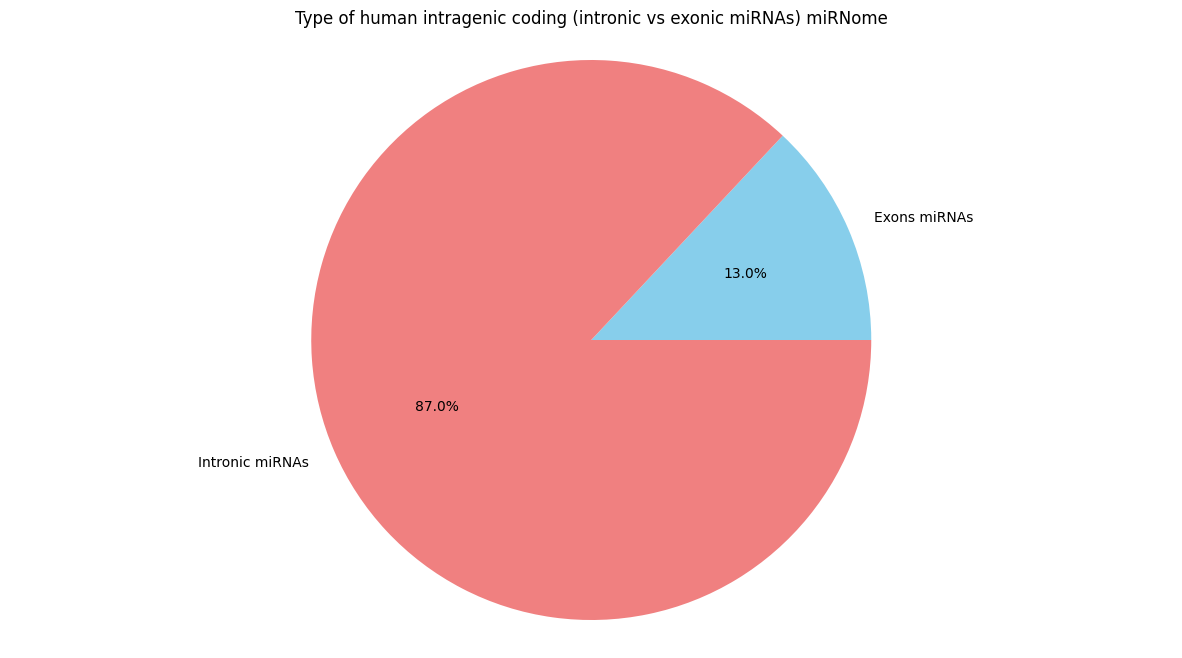

In [221]:
hg_intramiR_noncoding

,host_gene_region,Count
0,exons,85
1,introns,194


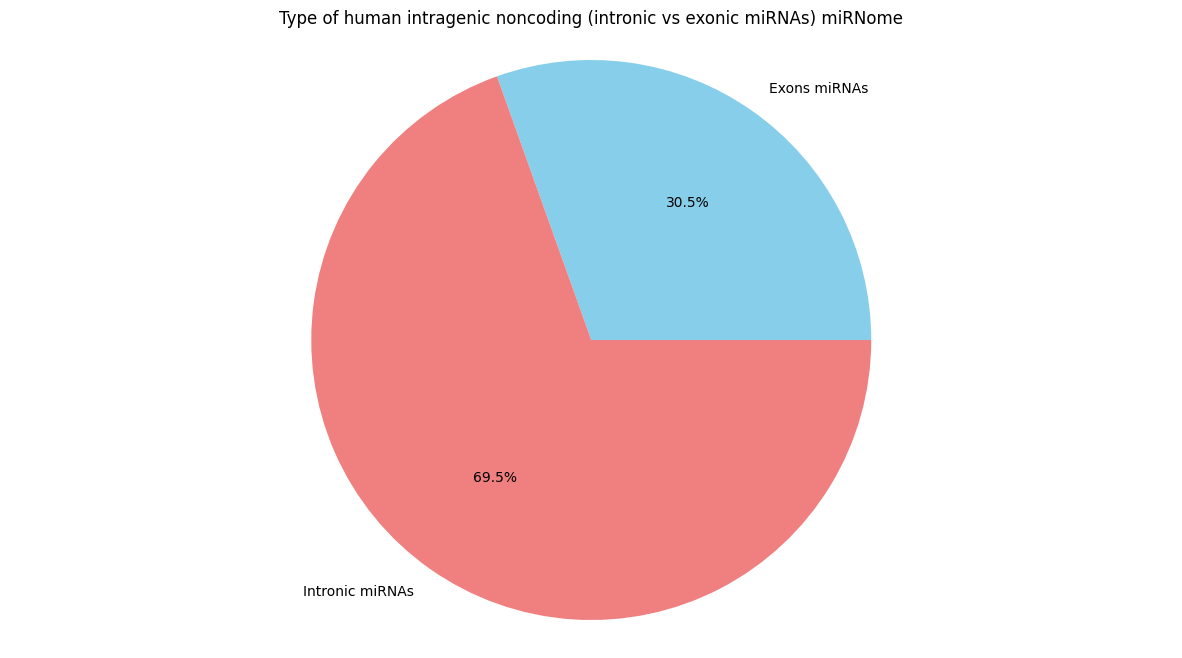

# ######---------------------------------------------------------------#######

### Human

In [170]:
Sub_hg_loci=Human_miR_type_finalized_df.groupby(Human_miR_type_finalized_df['miRNA_type']).size().reset_index(name='Count')

In [171]:
Sub_hg_loci

,miRNA_type,Count
0,exonic miR,201
1,intronic miR,969
2,no host mRNA miR,394
3,partially overlapped with exons or opposite tr...,349


In [172]:
hg_exonic=Sub_hg_loci[Sub_hg_loci['miRNA_type']=='exonic miR'].sum()
hg_intronic=Sub_hg_loci[Sub_hg_loci['miRNA_type']=='intronic miR'].sum()
# hg_no_hostmRNA=Sub_hg_loci[Sub_hg_loci['miRNA_type']=='no host mRNA miR'].sum()
# hg_partexons=Sub_hg_loci[Sub_hg_loci['miRNA_type']=='partially overlapped with exons or opposite transcriptional units'].sum()

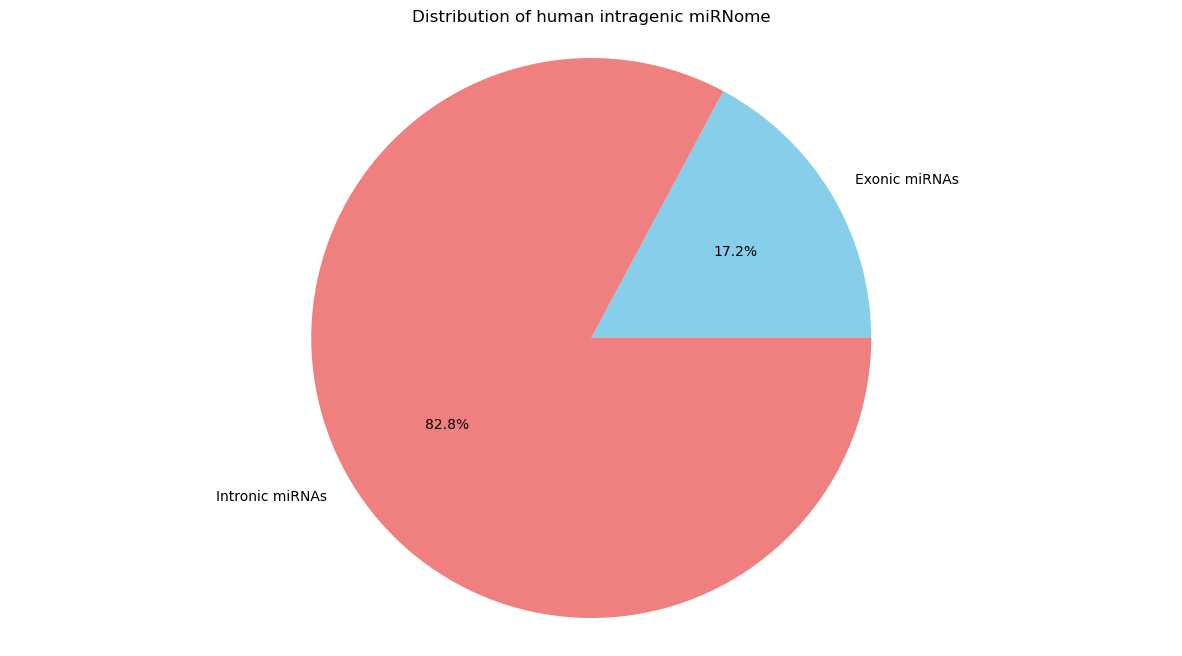

In [173]:
#Human miR loci distribution pie Chart
labels = ['Exonic miRNAs', 'Intronic miRNAs']
#'Intergenetic miRNAs','partially overlapped with exons or opposite transcriptional units' are removed

sizes = [hg_exonic['Count'], hg_intronic['Count']]#hg_no_hostmRNA['Count'],hg_partexons['Count'] are removed
colors = ['skyblue', 'lightcoral']#['lightgreen','orange'] is removed
plt.figure(figsize=(15, 8)) 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of human intragenic miRNome')
plt.savefig(f'{current_dir}/Human_eps_file/Distribution of human miRNome.eps')
plt.show()

In [174]:
Human_miR_type_finalized_df

,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID,miRNA_type,main_miRNA_type
0,chr1,17369,17436,miRNA_primary_transcript,hsa-mir-6859-1,-,Alias=MI0022705,intronic miR,intragenic
1,chr1,30366,30503,miRNA_primary_transcript,hsa-mir-1302-2,+,Alias=MI0006363,exonic miR,intragenic
2,chr1,187891,187958,miRNA_primary_transcript,hsa-mir-6859-2,-,Alias=MI0026420,intronic miR,intragenic
3,chr1,632615,632685,miRNA_primary_transcript,hsa-mir-12136,-,Alias=MI0039740,no host mRNA miR,intergenic
4,chr1,1167104,1167198,miRNA_primary_transcript,hsa-mir-200b,+,Alias=MI0000342,exonic miR,intragenic
...,...,...,...,...,...,...,...,...,...
1917,chrX,155457517,155457615,miRNA_primary_transcript,hsa-mir-1184-3,+,Alias=MI0015972,partially overlapped with exons or opposite tr...,intragenic
1918,chrY,1293918,1293992,miRNA_primary_transcript,hsa-mir-3690-2,+,Alias=MI0023561,partially overlapped with exons or opposite tr...,intragenic
1919,chrY,2609191,2609254,miRNA_primary_transcript,hsa-mir-6089-2,+,Alias=MI0023563,partially overlapped with exons or opposite tr...,intragenic
1920,chrY,4606120,4606228,miRNA_primary_transcript,hsa-mir-9985,+,Alias=MI0032313,no host mRNA miR,intergenic


In [175]:
# Save the files (unique lists)
Human_miR_type_finalized_df.to_csv(f'{csv_file_path}/Human_miR_type_finalized_df_unique.csv',index=False)
Human_miR_type_finalized_df.to_excel(f'{excel_file_path}/Human_miR_type_finalized_df_unique.xlsx',index=False)

## This is in thesis

### Noncoding vs Coding genes(Exonic_PLOT)

### Human

In [154]:
human_exonicmiR_df_gene_type=human_exonicmiR_df.drop_duplicates(subset=['miR_name'])

In [155]:
hg_miR_gene_type=human_exonicmiR_df_gene_type.groupby(human_exonicmiR_df_gene_type['gene_type']).size().reset_index(name='Count')

In [156]:
hg_miR_gene_type

,gene_type,Count
0,non-coding gene,85
1,protein-coding gene,116


In [157]:
hg_exonic_proteincoding= hg_miR_gene_type[hg_miR_gene_type['gene_type']=='protein-coding gene'].sum()
hg_exonic_noncoding= hg_miR_gene_type[hg_miR_gene_type['gene_type']=='non-coding gene'].sum()

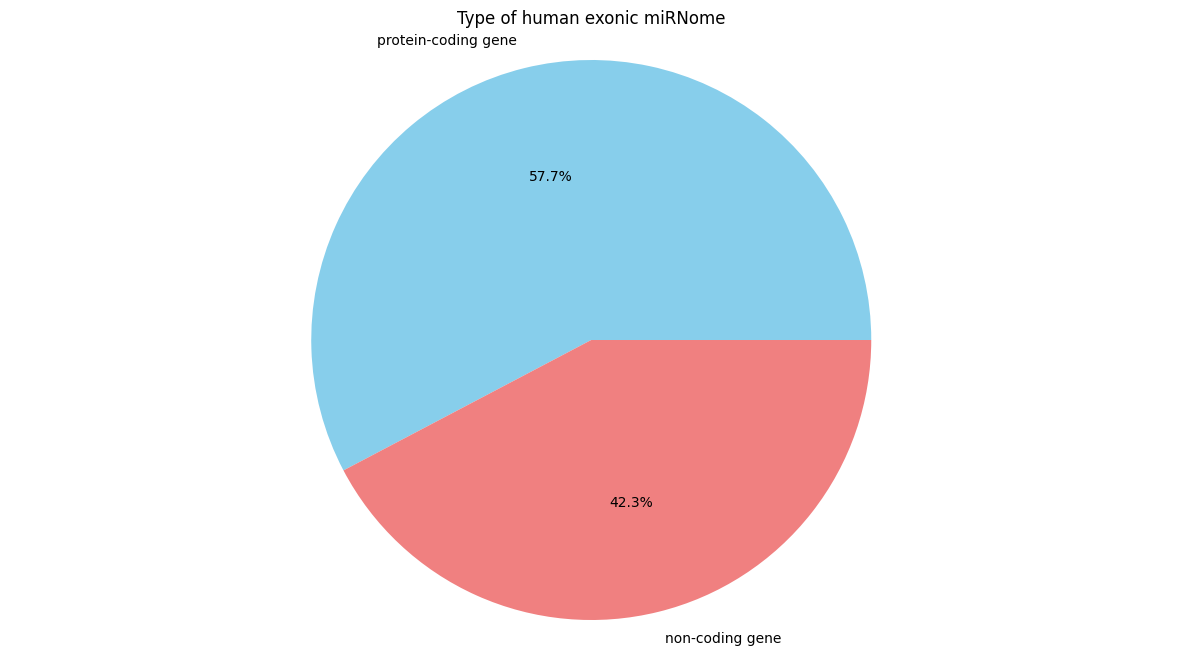

In [158]:
#Human miR loci distribution pie Chart
labels = ['protein-coding gene', 'non-coding gene']
sizes = [hg_exonic_proteincoding['Count'], hg_exonic_noncoding['Count']]
colors = ['skyblue','lightcoral', ]
plt.figure(figsize=(15, 8)) 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Type of human exonic miRNome')
plt.savefig(f'{current_dir}/Human_eps_file/Type of human exonic miRNome.eps')
plt.show()



### Noncodin vs Coding genes(Intronic_PLOT)

In [161]:
hg_miR_intronic_gene_type=human_intronicmiR_df.groupby(human_intronicmiR_df_gene_type['gene_type']).size().reset_index(name='Count')

In [162]:
hg_miR_intronic_gene_type

,gene_type,Count
0,non-coding gene,194
1,protein-coding gene,775


In [163]:
hg_intronic_proteincoding= hg_miR_intronic_gene_type[hg_miR_intronic_gene_type['gene_type']=='protein-coding gene'].sum()
hg_intronic_noncoding= hg_miR_intronic_gene_type[hg_miR_intronic_gene_type['gene_type']=='non-coding gene'].sum()

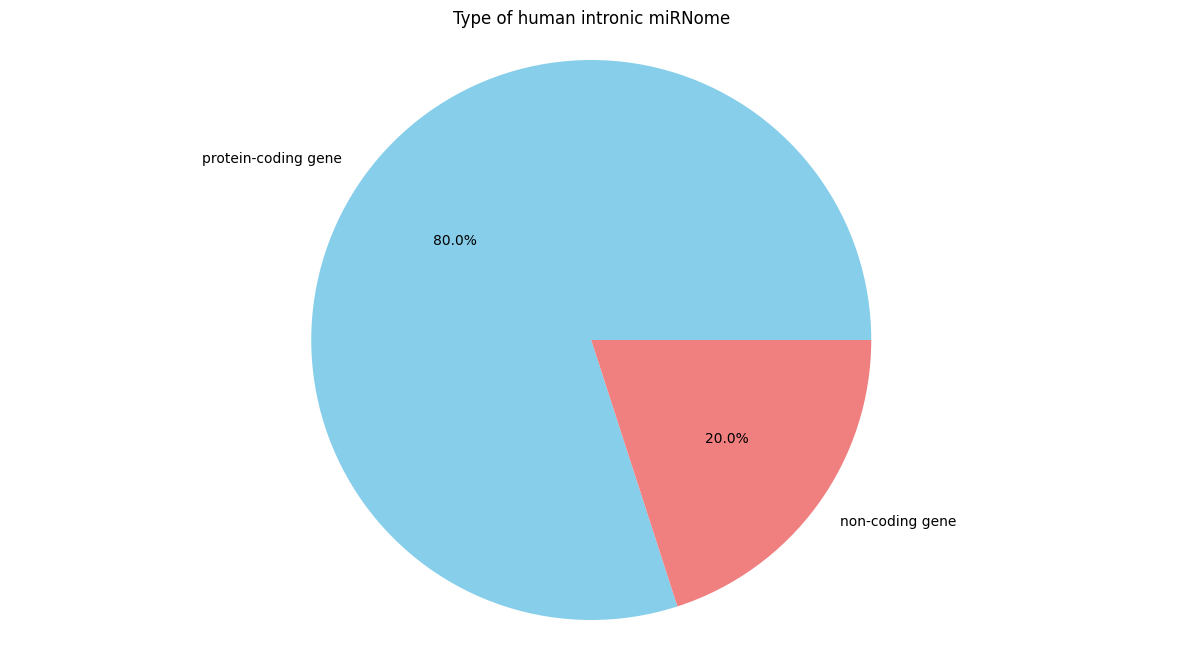

In [164]:
#Human miR loci distribution pie Chart
labels = ['protein-coding gene', 'non-coding gene']
sizes = [hg_intronic_proteincoding['Count'], hg_intronic_noncoding['Count']]
colors = ['skyblue','lightcoral', ]
plt.figure(figsize=(15, 8)) 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Type of human intronic miRNome')
plt.savefig(f'{current_dir}/Human_eps_file/Type of human intronic miRNome.eps')
plt.show()


### Species merge

In [336]:
# speices_exonic_miR_region=speices_exonic_miR_region.merge(zfish_exonic_miR_region,on="region",how="left")

In [337]:
# speices_exonic_miR_region['Zebrafish']=speices_exonic_miR_region['Zebrafish'].fillna(0)

In [191]:
speices_exonic_miR_region=human_exonic_miR_region.merge(mouse_exonic_miR_region,on="region",how="left")

In [192]:
speices_exonic_miR_region

,region,Human,Mouse
0,3'UTR,57,32
1,5'UTR,29,26
2,CDS,25,19
3,Span from CDS and 3'UTR,4,2
4,Span from CDS and 5'UTR,1,1


In [193]:
speices_exonic_miR_region=speices_exonic_miR_region.set_index('region')

In [194]:
speices_exonic_miR_region=speices_exonic_miR_region.T

In [195]:
speices_exonic_miR_region

region,3'UTR,5'UTR,CDS,Span from CDS and 3'UTR,Span from CDS and 5'UTR
Human,57,29,25,4,1
Mouse,32,26,19,2,1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 500x800 with 0 Axes>

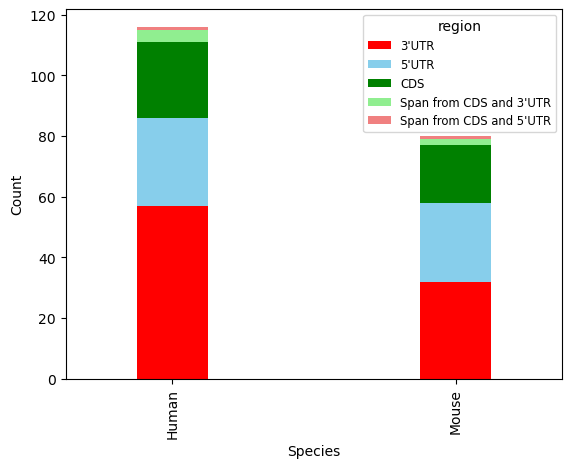

In [196]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(5,8))
speices_exonic_miR_region.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green','lightgreen', 'lightcoral', 'orange'],width=0.25)
# labels for x & y axis


plt.legend(title='region',loc="upper right", fontsize="small")
plt.xlabel('Species')
plt.ylabel('Count')
plt.savefig('Distribution of exonic miRNome.eps')
plt.show()